Anem a practicar i a familiaritzar-nos amb regressions.

- Objectius:
Models de regressió,
Àrbres de regressió,
Random Forest,
Xarxes Neuronals i
Altres models


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

import statsmodels.api as sm
from pandas_profiling import ProfileReport

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1046]:
df = pd.read_csv('DelayedFlights.csv')
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [284]:
# profile = ProfileReport(df, minimal=True)
# profile

### Nivell 1
### Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible  
l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

#### Variables Categòriques i imputació de nuls

In [285]:
len(df['UniqueCarrier'].unique())

20

In [286]:
len(df['Origin'].unique())

303

In [287]:
len(df['Dest'].unique())

304

In [288]:
len(df['TailNum'].unique())

5367

In [289]:
len(df['CancellationCode'].unique())

4

Si faig el one hot enconding per les columnes categòriques de carriers, origin, destiny i cancel el dataframe creix moltissim (600 columnes més) i haig de treure un sample de 50000 per poder fer el train del model. 

In [1047]:
# Eliminem les categòriques per poder fer poder estimar ràpidament les primeres prediccions i 
# quin pes tenen aquestes variables en el target que volem predir:
df_1 = df
df_1.drop(['Unnamed: 0','UniqueCarrier', 'TailNum',
         'CancellationCode', 'Origin', 'Dest' ], axis=1, inplace=True)

In [21]:
forecast_col ='ArrDelay'

In [290]:
corr1 = df[df.columns[1:]].corr()['ArrDelay'][:]

In [291]:
corr1

Year                      NaN
Month               -0.000897
DayofMonth           0.004129
DayOfWeek            0.006123
DepTime              0.127017
CRSDepTime           0.044447
ArrTime             -0.050948
CRSArrTime           0.043078
FlightNum            0.061266
ActualElapsedTime    0.068130
CRSElapsedTime      -0.015676
AirTime             -0.000189
ArrDelay             1.000000
DepDelay             0.952927
Distance            -0.029853
TaxiIn               0.156277
TaxiOut              0.286484
Cancelled                 NaN
Diverted                  NaN
CarrierDelay         0.501773
WeatherDelay         0.264624
NASDelay             0.387606
SecurityDelay       -0.002488
LateAircraftDelay    0.478123
Name: ArrDelay, dtype: float64

In [1049]:
for i in df_1.columns:
    df_1[i].fillna(df_1[i].median(), inplace = True)

In [295]:
df_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,0,2.0,0.0,2.0,0.0,8.0
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,0,2.0,0.0,2.0,0.0,8.0
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,0,2.0,0.0,2.0,0.0,8.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,0,2.0,0.0,2.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,1621,147.0,152.0,120.0,25.0,30.0,906,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,1631,127.0,109.0,78.0,75.0,57.0,481,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,1631,162.0,143.0,122.0,99.0,80.0,689,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,1639,115.0,117.0,89.0,9.0,11.0,533,13.0,13.0,0,0,2.0,0.0,2.0,0.0,8.0


#### Examen de colinealitat (corr) 

In [296]:
corr2 = df_1[df_1.columns[1:]].corr()['ArrDelay'][:]

In [297]:
corr2

Month               -0.001193
DayofMonth           0.004068
DayOfWeek            0.006136
DepTime              0.126781
CRSDepTime           0.044521
ArrTime             -0.051065
CRSArrTime           0.042955
FlightNum            0.061117
ActualElapsedTime    0.068439
CRSElapsedTime      -0.016079
AirTime              0.000181
ArrDelay             1.000000
DepDelay             0.947660
Distance            -0.030161
TaxiIn               0.156104
TaxiOut              0.284920
Cancelled           -0.005781
Diverted            -0.020272
CarrierDelay         0.535340
WeatherDelay         0.277861
NASDelay             0.437473
SecurityDelay        0.011215
LateAircraftDelay    0.519247
Name: ArrDelay, dtype: float64

In [298]:
# Comparem les correlacions amb el target abans i després d'imputar. 
#Agafem el mètode d'imputació que faci variar menys la correlació, en aquest cas la mediana:

corr1-corr2

ActualElapsedTime   -0.000310
AirTime             -0.000369
ArrDelay             0.000000
ArrTime              0.000117
CRSArrTime           0.000123
CRSDepTime          -0.000074
CRSElapsedTime       0.000402
Cancelled                 NaN
CarrierDelay        -0.033567
DayOfWeek           -0.000013
DayofMonth           0.000061
DepDelay             0.005267
DepTime              0.000237
Distance             0.000308
Diverted                  NaN
FlightNum            0.000149
LateAircraftDelay   -0.041124
Month                0.000296
NASDelay            -0.049867
SecurityDelay       -0.013703
TaxiIn               0.000173
TaxiOut              0.001565
WeatherDelay        -0.013237
Year                      NaN
Name: ArrDelay, dtype: float64

####  Multicolinealitat (VIF)

In [299]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [300]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Year,40.037
1,Month,1.006
2,DayofMonth,1.004
3,DayOfWeek,1.002
4,DepTime,5.177
5,CRSDepTime,5.100
6,ArrTime,1.716
7,CRSArrTime,2.896
8,FlightNum,1.170
9,ActualElapsedTime,3036.514


Observem un coeficient molt elevat de VIF (Variable Inflation Factors) en les variables:  
- ActualElapsedTime:	3036.514
- AirTime: 	2789.336
- TaxiOut:	119.252
- CRSElapsedTime:	113.391

La pròpia variable 'Arrival Delay' te un VIF de 63.714, fet que indica una elevada multicolinealitat. Provem d'eliminar la primera variable amb el VIF més elevat, fins a arribar a un coeficient acceptable de VIF, successivament

In [1050]:
df_1.drop(['ActualElapsedTime'], axis = 1, inplace = True)

In [305]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Year,40.009
1,Month,1.006
2,DayofMonth,1.004
3,DayOfWeek,1.002
4,DepTime,5.177
5,CRSDepTime,5.100
6,ArrTime,1.716
7,CRSArrTime,2.896
8,FlightNum,1.170
9,CRSElapsedTime,112.928


Eliminem la següent variable amb el VIF més elevat: CRSElapsedTime.

In [1051]:
df_1.drop(['CRSElapsedTime'], axis = 1, inplace = True)

In [307]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Year,38.770
1,Month,1.006
2,DayofMonth,1.004
3,DayOfWeek,1.002
4,DepTime,5.175
5,CRSDepTime,5.096
6,ArrTime,1.716
7,CRSArrTime,2.891
8,FlightNum,1.168
9,AirTime,27.552


S'ha donat una important disminució del VIF però encara no és suficient, eliminem la variable 'Year':

In [1052]:
df_1.drop(['Year'], axis = 1, inplace = True)

In [309]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Month,3.822
1,DayofMonth,3.932
2,DayOfWeek,4.532
3,DepTime,63.980
4,CRSDepTime,63.791
5,ArrTime,16.057
6,CRSArrTime,38.504
7,FlightNum,2.433
8,AirTime,88.337
9,ArrDelay,40.068


Eliminem 'Air Time':

In [1053]:
df_1.drop(['AirTime'], axis = 1, inplace = True)

In [311]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Month,3.805
1,DayofMonth,3.904
2,DayOfWeek,4.503
3,DepTime,63.865
4,CRSDepTime,63.777
5,ArrTime,15.931
6,CRSArrTime,38.404
7,FlightNum,2.385
8,ArrDelay,35.929
9,DepDelay,31.996


La següent és la variable 'Departure time':

In [1054]:
df_1.drop(['DepTime'], axis = 1, inplace = True)

In [313]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Month,3.805
1,DayofMonth,3.904
2,DayOfWeek,4.503
3,CRSDepTime,24.687
4,ArrTime,15.500
5,CRSArrTime,37.559
6,FlightNum,2.383
7,ArrDelay,35.928
8,DepDelay,31.921
9,Distance,3.133


La següent és CRS Arrival Time:

In [1055]:
df_1.drop(['CRSArrTime'], axis = 1, inplace = True)

In [315]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Month,3.801
1,DayofMonth,3.903
2,DayOfWeek,4.501
3,CRSDepTime,13.113
4,ArrTime,10.712
5,FlightNum,2.383
6,ArrDelay,35.864
7,DepDelay,31.755
8,Distance,3.108
9,TaxiIn,2.938


La següent és CRS Dep Time:

In [1056]:
df_1.drop(['CRSDepTime'], axis = 1, inplace = True)

In [320]:
X = df_1.iloc[:,:-1]
vif = round(calc_vif(X),3)

In [321]:
vif

,variables,VIF
0,Month,3.748
1,DayofMonth,3.829
2,DayOfWeek,4.348
3,ArrTime,6.806
4,FlightNum,2.367
5,ArrDelay,35.609
6,DepDelay,30.963
7,Distance,3.085
8,TaxiIn,2.923
9,TaxiOut,4.768


Les variables que hem eliminat per arribar fins aquí són les següents i en aquest ordre:
- ActualElapsedTime
- CRSElapsedTime
- Year
- AirTime
- DepTime
- CRSArrTime
- CRSDepTime  

Encara no tenim un VIF adequat per al target però deixem l'eliminar la variable Dep Delay per l'últim exercici:

In [319]:
for i in vif['variable']:
    print(i)

Month
DayofMonth
DayOfWeek
ArrTime
FlightNum
ArrDelay
DepDelay
Distance
TaxiIn
TaxiOut
Cancelled
Diverted
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay


#### Mostra i divisió en train i test

In [1057]:
df_sample = df_1.sample(100000, random_state = 0)

In [1058]:
# Features = X
# Labels = y

X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [1059]:
# Comprovem que tinguin la mateixa len
print(len(X), len(y))

100000 100000


In [1060]:
# Creem el train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#### 1. LinearRegression:

In [1061]:
clf = LinearRegression(n_jobs=-1)

In [1062]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [1063]:
score_test

0.990417503771798

In [1064]:
clf.coef_

array([-4.04682071e-02, -2.60850069e-03, -3.56988404e-02,  1.17876572e-05,
       -1.86613616e-05,  7.99024040e-02, -1.88386942e-03,  1.22834523e-01,
        1.05866417e-01,  1.11865798e+01,  1.20546383e+01,  9.47462692e-01,
        9.40438893e-01,  9.49302197e-01,  1.01802979e+00,  9.49344805e-01])

In [1065]:
clf.intercept_

-4.940090017898676

In [1066]:
# Fem la predicció
lr_pred = clf.predict(X_test)

In [1067]:
print(lr_pred)

[ 7.25458602 11.10764492 39.47540916 ... 15.56551969  8.85122376
 34.12057672]


In [1068]:
# Df comparatiu de l'X_test i la seva corresponent predicció:

df_lr=pd.DataFrame({'Actual':y_test, 'Predicted':lr_pred})
df_lr

,Actual,Predicted
0,10.0,7.254586
1,15.0,11.107645
2,42.0,39.475409
3,162.0,162.943771
4,46.0,43.553814
...,...,...
19995,29.0,24.719820
19996,248.0,255.210132
19997,18.0,15.565520
19998,12.0,8.851224


In [1070]:
X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.9903400140816166 0.9903384682210734


In [383]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.406e+05
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        12:23:38   Log-Likelihood:            -3.1491e+05
No. Observations:              100000   AIC:                         6.299e+05
Df Residuals:                   99983   BIC:                         6.300e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9907      0.095    -52.635      0.000      -5.177      -4.805
x1            -0.0410      0.005     -7.970      0.000      -0.051      -0.031
x2            -0.0028      0.002     -1.356      0.175      -0.007       0.001
x3            -0.0400      0.009     -4.478      0.000      -0.058      -0.023
x4          5.271e-05   3.28e-05      1.606      0.108   -1.16e-05       0.000
x5         -1.938e-05    9.9e-06     -1.957      0.050   -3.88e-05     2.7e-08
x6             0.0803      0.002     52.490      0.000       0.077       0.083
x7            -0.0019   3.38e-05    -56.160      0.000      -0.002      -0.002
x8             0.1240      0.004     34.133      0.000       0.117       0.131
x9             0.1058      0.002     60.761      0.000       0.102       0.109
x10           11.1982      0.945     11.849      0.000       9.346      13.051
x11           11.8929      0.302     39.428      0.000      11.302      12.484
x12            0.9473      0.002    581.064      0.000       0.944       0.951
x13            0.9414      0.002    514.809      0.000       0.938       0.945
x14            0.9489      0.002    608.222      0.000       0.946       0.952
x15            1.0270      0.013     81.335      0.000       1.002       1.052
x16            0.9490      0.002    574.985      0.000       0.946       0.952
==============================================================================
Omnibus:                    48940.698   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           343647.679
Skew:                          -2.270   Prob(JB):                         0.00
Kurtosis:                      10.865   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2. DecisionTreeRegressor:

In [1072]:
regressor = DecisionTreeRegressor(random_state=0)

In [1073]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [1080]:
# Fem la predicció

rt_pred = regressor.predict(X_test)

In [1081]:
rt_pred

array([ 6., 15., 38., ..., 18.,  0., 37.])

In [1082]:
# Comparem les prediccions de l'X_test amb el retard d'arribada de veritat(y_test):

df_rt=pd.DataFrame({'Actual':y_test, 'Predicted':rt_pred})
df_rt

,Actual,Predicted
0,10.0,6.0
1,15.0,15.0
2,42.0,38.0
3,162.0,161.0
4,46.0,46.0
...,...,...
19995,29.0,29.0
19996,248.0,241.0
19997,18.0,18.0
19998,12.0,0.0


##### Feature Importance

In [1074]:
np.round(regressor.feature_importances_, 3)

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.889, 0.002, 0.001, 0.015,
       0.001, 0.008, 0.006, 0.002, 0.068, 0.   , 0.005])

Veiem que els features de més importància per al Decision Tree Regressor són el 5 (0.889), el 8 (0.015) i el 13 (0.068). Corresponen a les variables DepDelay, TaxiOut i NASDelay respectivament.

In [1075]:
X = (df_sample.drop([forecast_col], 1))

In [1077]:
X.iloc[:, 5]

595091     22.0
699277      7.0
513280     22.0
555111     16.0
1269142    19.0
           ... 
532846     29.0
127288     63.0
495358     83.0
569662     11.0
86521      50.0
Name: DepDelay, Length: 100000, dtype: float64

In [1078]:
X.iloc[:, 8]

595091      9.0
699277     13.0
513280     20.0
555111     14.0
1269142     8.0
           ... 
532846     13.0
127288     63.0
495358     15.0
569662     18.0
86521      31.0
Name: TaxiOut, Length: 100000, dtype: float64

In [1079]:
X.iloc[:, 13]

595091      2.0
699277      2.0
513280      2.0
555111      2.0
1269142     0.0
           ... 
532846      1.0
127288     55.0
495358     12.0
569662      5.0
86521       2.0
Name: NASDelay, Length: 100000, dtype: float64

In [1083]:
i_col = (df_sample.drop([forecast_col], 1))

Serveix per la part d'enginyeria de variables

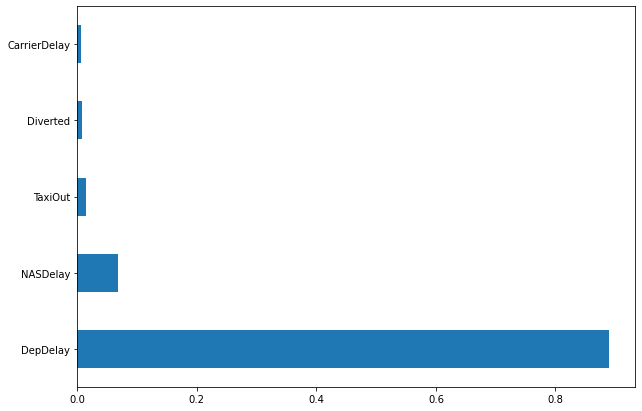

In [392]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(regressor.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');

#### 3. RandomForestRegressor:

In [1084]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [1085]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1086]:
rf_pred=rf.predict(X_test)
rf_pred

array([ 5.23, 15.  , 40.73, ..., 18.  ,  3.52, 36.64])

In [1087]:
df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':rt_pred})
df_rf

,Actual,Predicted
0,10.0,6.0
1,15.0,15.0
2,42.0,38.0
3,162.0,161.0
4,46.0,46.0
...,...,...
19995,29.0,29.0
19996,248.0,241.0
19997,18.0,18.0
19998,12.0,0.0


In [1088]:
np.round(rf.feature_importances_, 3)

array([0.001, 0.001, 0.   , 0.001, 0.001, 0.888, 0.002, 0.001, 0.015,
       0.001, 0.006, 0.006, 0.002, 0.068, 0.   , 0.005])

In [1089]:
i_col = (df_sample.drop([forecast_col], 1))

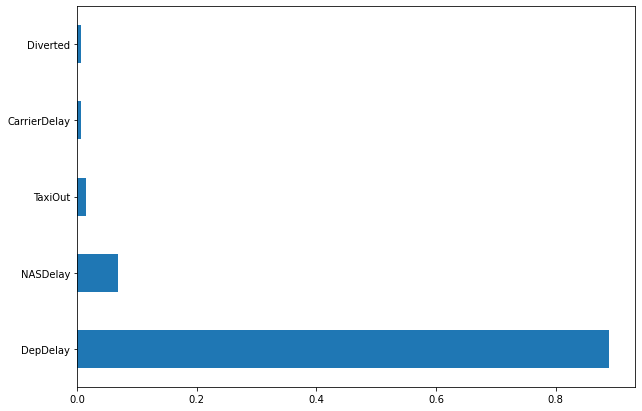

In [1091]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rf.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');

### Exercici 2
Compara’ls en base al MSE i al R2 .

##### Linear regression:

In [1093]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 3.9599220915768267
Mean Squared Error: 31.41788831029009
Root Mean Squared Error: 5.605166216116173


##### Regression Decision Tree:

In [1094]:
# print('Absolute Error:', abs(y_test - rt_pred).sum())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 4.0904
Mean Squared Error: 68.6924
Root Mean Squared Error: 8.288087837372382


##### Random forest regressor:

In [1095]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 2.9115595
Mean Squared Error: 33.60614653499999
Root Mean Squared Error: 5.797080863244879


### Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

#### LinearRegression canviant paràmetres:

Canviem el paràmetre de 'fit_intercept' a False perquè no calculi l'intercept per aquest model. Posem 'normalize = True' perquè ens normalitzi els features, però ignora aquest paràmetre si posem 'fit_intercept' = False.  
Determinem 'n-jobs' = -1 perquè faci servir tots els processadors disponibles. Sense calcular l'intecept el model és desastrós, com veiem en les seves prediccions.

In [402]:
clf = LinearRegression(fit_intercept = False, normalize=True, n_jobs = -1)

In [403]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)
score_train = clf.score(X_train, y_train)

In [404]:
score_test,score_train 

(0.9901285580299546, 0.9900577159742667)

In [405]:
clf.coef_

array([-1.21721635e-01, -3.57249474e-02, -2.03886003e-01, -9.45827697e-04,
       -1.84890877e-04,  6.66872398e-02, -2.42571840e-03,  8.13263207e-02,
        8.17393793e-02,  1.24520632e+01,  1.27622727e+01,  9.58935334e-01,
        9.53402631e-01,  9.64471157e-01,  1.02544349e+00,  9.59397715e-01])

In [406]:
clf.intercept_

0.0

In [407]:
# Fem la predicció amb els nous paràmetres:
lr_pred = clf.predict(X_test)

In [408]:
print(lr_pred)

[ 7.24666659 11.24469554 40.91267411 ... 17.30209313  7.95179368
 34.86078818]


In [409]:
df_lr=pd.DataFrame({'Actual':y_test, 'Predicted':lr_pred})
df_lr

,Actual,Predicted
0,10.0,7.246667
1,15.0,11.244696
2,42.0,40.912674
3,162.0,162.290393
4,46.0,44.230974
...,...,...
19995,29.0,25.339207
19996,248.0,253.827376
19997,18.0,17.302093
19998,12.0,7.951794


### DecisionTreeRegressor canviant paràmetres:

##### Visualització de l'efecte del paràmete max_depth en el MAE de train i test. max depth = rang (1-50):

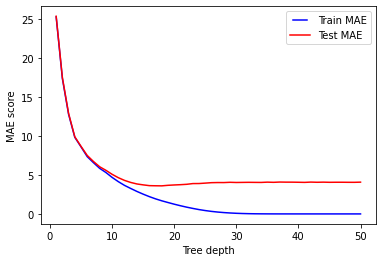

In [489]:
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train MAE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('Tree depth')
plt.show()

##### Visualització de l'efecte del paràmete min_samples_split en el MAE de train i test. min_samples_split = rang(0.1 -1):

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


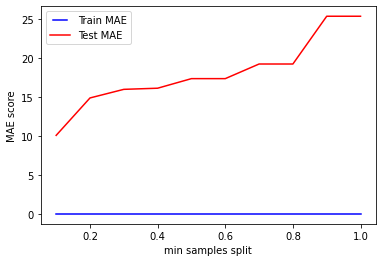

In [488]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train MAE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min samples split')
plt.show()

##### Visualització de l'efecte del paràmete min_samples_leaf en el MAE de train i test. min_samples_leaf = rang(0.01 -0.5):

[0.001      0.02726316 0.05352632 0.07978947 0.10605263 0.13231579
 0.15857895 0.18484211 0.21110526 0.23736842 0.26363158 0.28989474
 0.31615789 0.34242105 0.36868421 0.39494737 0.42121053 0.44747368
 0.47373684 0.5       ]


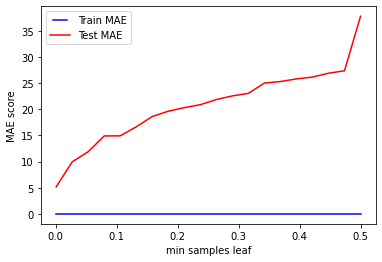

In [496]:
min_samples_leafs = np.linspace(0.001, 0.5, 20, endpoint=True)

print(min_samples_leafs)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train MAE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min samples leaf')
plt.show()

##### Visualització de l'efecte del paràmete max_features en el MAE de train i test. max_features = rang(1-16):

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


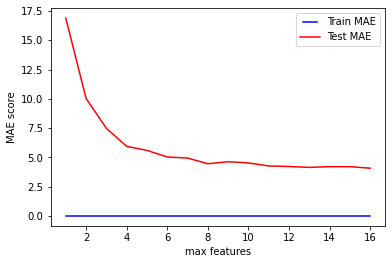

In [498]:
max_features = list(range(1,df_sample.shape[1]))

print(max_features)
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeRegressor(max_features=max_feature)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train MAE')
line2, = plt.plot(max_features, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('max features')
plt.show()

Conclusió: canviem el paràmetre max_depth a 15. Deixem min_samples_leaf i min_samples_split per defecte al mínim. D'aquesta manera aconseguim reduïr els marges d'errors en les 3 mesures de correció emprades (MAE, MSE, RMSE) en comparació a l'estimació inicial.  



In [1096]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [1097]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [1098]:
rt_pred = regressor.predict(X_test)

In [1099]:
rt_pred

array([ 5.58591549, 15.        , 39.        , ..., 16.62555066,
       -1.26315789, 36.5       ])

In [1100]:
# Comparem les prediccions amb els nous paràmetres amb les autèntiques:
df_rt=pd.DataFrame({'Actual':y_test, 'Predicted':rt_pred})
df_rt

,Actual,Predicted
0,10.0,5.585915
1,15.0,15.000000
2,42.0,39.000000
3,162.0,163.494845
4,46.0,46.469388
...,...,...
19995,29.0,29.000000
19996,248.0,241.000000
19997,18.0,16.625551
19998,12.0,-1.263158


In [1101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 3.7131842926710417
Mean Squared Error: 51.62210311718909
Root Mean Squared Error: 7.184852337883437


### Random forest regressor canviant paràmetres:

##### Visualització de l'efecte del paràmetre N_estimators en el MAE de train i test. 

[1, 2, 4, 8, 16, 32, 64, 100, 200]


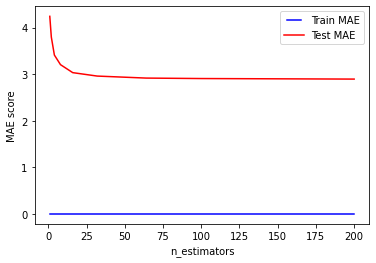

In [499]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

print(n_estimators)
train_results = []
test_results = []

for estimator in n_estimators:
    dt = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train MAE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('n_estimators')
plt.show()

##### Visualització de l'efecte del paràmete max_depth en el MAE de train i test. max depth = rang (1-50):

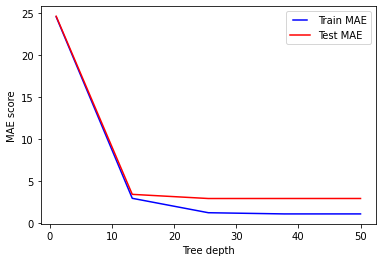

In [506]:
max_depths = np.linspace(1, 50, 5, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = RandomForestRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train MAE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('Tree depth')
plt.show()

##### Visualització de l'efecte del paràmete min_samples_split en el MAE de train i test. min_samples_split = rang(0.1 -1):

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


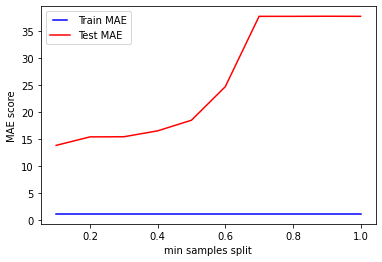

In [516]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = RandomForestRegressor(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train MAE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min samples split')
plt.show()

##### Visualització de l'efecte del paràmete min_samples_leaf en el MAE de train i test. min_samples_leaf = rang(0.01 -0.5):

[0.1 0.2 0.3 0.4 0.5]


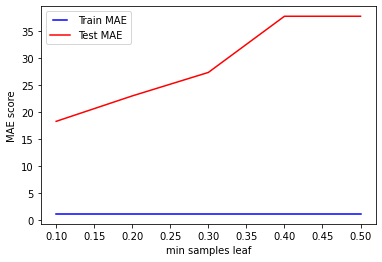

In [518]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

print(min_samples_leafs)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = RandomForestRegressor(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train MAE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min samples leaf')
plt.show()

##### Visualització de l'efecte del paràmete max_features en el MAE de train i test. max_features = rang(1-16):

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


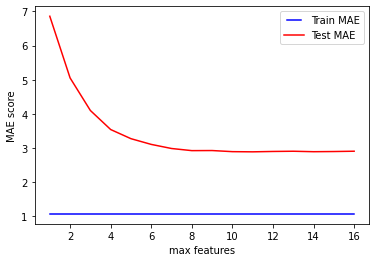

In [519]:
max_features = list(range(1,df_sample.shape[1]))

print(max_features)
train_results = []
test_results = []

for max_feature in max_features:
    dt = RandomForestRegressor(max_features=max_feature)
    dt.fit(X_train, y_train)
    
    train_results.append(metrics.mean_absolute_error(y_train, train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train MAE')
line2, = plt.plot(max_features, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('max features')
plt.show()

Conclusió: en el cas del # Random Forest Regressor podem canviar principalment el paràmetre del número d'arbres que volem generar. En el  cas del nostre dataset, el cost computacional és molt gran així que hem canviat el parametre per defecte(100) a 500. Tambe hem fet servir el 'random_state', per tenir resultats reproduibles, i canviat el 'max_features' a 'sqrt'.

In [1102]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)

In [1103]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=30, random_state=42)

In [1104]:
rf_pred=rf.predict(X_test)
rf_pred

array([ 5.42738095, 15.        , 40.9       , ..., 18.        ,
        4.56666667, 36.6       ])

In [1105]:
df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':rt_pred})
df_rf

,Actual,Predicted
0,10.0,5.585915
1,15.0,15.000000
2,42.0,39.000000
3,162.0,163.494845
4,46.0,46.469388
...,...,...
19995,29.0,29.000000
19996,248.0,241.000000
19997,18.0,16.625551
19998,12.0,-1.263158


In [1106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 2.963286064477379
Mean Squared Error: 34.38257981703132
Root Mean Squared Error: 5.86366607311768


### Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

** Tots els resultats d'aquest exercici es poden comparar amb les mètriques utilitzant l'aproximació train/test de l'exercici2.

#### LinearRegression sense train/test (validació interna):

In [1107]:
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [1108]:
clf = LinearRegression(n_jobs=-1)

In [1109]:
clf.fit(X, y)
score = clf.score(X, y)

In [1110]:
score

0.9903400140816166

In [1111]:
lr_pred_int = clf.predict(X)

In [1115]:
print(lr_pred_int)

[ 7.78134601  7.47909742  7.54179915 ... 94.05433852 12.31297114
 50.41674587]


In [1113]:
df_pred_int=pd.DataFrame({'Actual':y, 'Predicted':lr_pred_int})
df_pred_int

,Actual,Predicted
0,9.0,7.781346
1,-3.0,7.479097
2,13.0,7.541799
3,11.0,7.901060
4,19.0,13.587875
...,...,...
99995,25.0,20.725331
99996,115.0,117.244626
99997,95.0,94.054339
99998,16.0,12.312971


Podem observar que en aquest cas, fent validació interna, el resultat no varia massa.

In [1114]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, lr_pred_int))
print('Mean Squared Error:', metrics.mean_squared_error(y, lr_pred_int))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, lr_pred_int)))

Mean Absolute Error: 3.959861426034542
Mean Squared Error: 31.826970052209123
Root Mean Squared Error: 5.641539688082423


#### DecisionTreeRegressor sense train/test (validació interna):

In [1116]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [1117]:
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [1118]:
rt_pred_int = regressor.predict(X)

In [1119]:
rt_pred_int

array([ 9., -3., 13., ..., 95., 16., 52.])

In [1120]:
df_pred_int=pd.DataFrame({'Actual':y, 'Predicted':rt_pred_int})
df_pred_int

,Actual,Predicted
0,9.0,9.0
1,-3.0,-3.0
2,13.0,13.0
3,11.0,11.0
4,19.0,19.0
...,...,...
99995,25.0,25.0
99996,115.0,115.0
99997,95.0,95.0
99998,16.0,16.0


In [1121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, rt_pred_int))
print('Mean Squared Error:', metrics.mean_squared_error(y, rt_pred_int))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, rt_pred_int)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


#### RandomForestRegressor sense train/test (validació interna):

In [1122]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)

In [1123]:
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [1124]:
rf_pred_int=rf.predict(X)
rf_pred_int

array([ 8.11, -0.16,  9.57, ..., 94.49, 16.  , 50.83])

In [1125]:
df_rf_int=pd.DataFrame({'Actual':y, 'Predicted':rt_pred_int})
df_rf_int

,Actual,Predicted
0,9.0,9.0
1,-3.0,-3.0
2,13.0,13.0
3,11.0,11.0
4,19.0,19.0
...,...,...
99995,25.0,25.0
99996,115.0,115.0
99997,95.0,95.0
99998,16.0,16.0


In [1126]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, rf_pred_int))
print('Mean Squared Error:', metrics.mean_squared_error(y, rf_pred_int))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, rf_pred_int)))

Mean Absolute Error: 1.0423175999999998
Mean Squared Error: 5.675105425999998
Root Mean Squared Error: 2.3822479774364376


### Nivell 2

#### Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

### Comparació de diferents processos d'enginyeria de variables amb regressió lineal

- Fins ara el que hem fet en relació a la enginyeria de variables ha estat: eliminar columnes categòriques, imputar els null values i visualitzar els features importance dels algoritmes de Decision Tree i Random Forest.
- Ara intentarem millorar els models inicials o si més no veure quin efecte tenen diferents maneres de fer enginyeria de variables.

#### 0. Recuperació de les variables categòriques

In [3]:
df = pd.read_csv('DelayedFlights.csv')
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(5)

In [4]:
df_1 = df
df_1.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
df_1

In [5]:
df_1['Origin'].value_counts(ascending=False)

ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
IAH     56847
PHX     55720
LAS     53710
EWR     52925
DTW     43923
SFO     43801
MCO     36139
CLT     35055
JFK     34706
MSP     32436
LGA     31185
SEA     31060
BWI     30710
PHL     30316
MDW     29222
SLC     28675
BOS     28196
SAN     24828
CVG     23881
MIA     23273
IAD     22125
TPA     20199
HOU     19639
FLL     19363
DAL     18710
MEM     18121
DCA     17725
STL     17328
OAK     17031
BNA     16496
CLE     16398
MCI     16022
RDU     15383
PDX     13791
SMF     13644
SJC     13082
MKE     11876
AUS     11843
SNA     11554
SAT     10902
PIT     10799
ABQ     10674
MSY     10498
IND      9710
HNL      8666
ONT      8646
CMH      8394
JAX      7933
PBI      7684
BUR      7259
BUF      6777
RSW      6602
BDL      6496
OMA      6423
RNO      6146
OKC      6114
BHM      6068
SJU      5918
SDF      5786
PVD      5694
TUL      5600
TUS      5531
ANC      5140
ELP      4828
RIC      4784
MHT      4686
LIT   

In [6]:
# Fem label encoder de les variables categòriques origin i destination, que 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_1['Origin']= encoder.fit_transform(df_1['Origin'])

df_1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,135,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,135,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,140,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,140,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,140,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df_1['Origin'].value_counts(ascending=False)

18     131613
210    125979
81      95414
80      74323
157     58772
136     56847
220     55720
155     53710
96      52925
87      43923
259     43801
177     36139
63      35055
150     34706
199     32436
162     31185
258     31060
48      30710
219     30316
179     29222
267     28675
37      28196
249     24828
73      23881
186     23273
135     22125
285     20199
130     19639
104     19363
76      18710
181     18121
79      17725
275     17328
204     17031
35      16496
61      16398
175     16022
238     15383
216     13791
269     13644
264     13082
187     11876
20      11843
271     11554
250     10902
224     10799
2       10674
200     10498
140      9710
129      8666
209      8646
64       8394
149      7933
215      7684
47       7259
46       6777
248      6602
24       6496
207      6423
243      6146
206      6114
29       6068
266      5918
257      5786
233      5694
287      5600
289      5531
16       5140
91       4828
241      4784
185      4686
165   

In [8]:
df_1['Dest'].value_counts(ascending=False)

ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
EWR     55861
LAS     48858
PHX     47836
SFO     46876
IAH     43905
LGA     38137
MCO     36405
JFK     35506
DTW     34777
BOS     31961
SEA     31548
PHL     30795
BWI     29610
SLC     29217
MSP     28137
CLT     26898
SAN     26621
MDW     25318
IAD     22748
TPA     22665
FLL     20323
CVG     20056
DCA     19735
MIA     19706
STL     18582
OAK     18302
MCI     18205
CLE     17991
HOU     17712
RDU     17378
BNA     17338
PDX     16300
SMF     16007
MEM     15626
SJC     15577
AUS     15538
DAL     15179
SAT     14533
PIT     12487
ABQ     12183
SNA     12101
IND     11769
MSY     11706
MKE     10930
CMH     10780
ONT     10231
HNL     10095
JAX      9586
BDL      8905
OMA      8472
PBI      8463
OKC      8241
BUR      8185
BUF      7973
TUL      7777
TUS      7499
SJU      7464
BHM      7425
RSW      7316
RNO      7282
PVD      7212
SDF      6966
ELP      6587
ANC      6291
MHT      6010
RIC      5892
LIT   

In [9]:
# Fem label encoder de les variables categòriques origin, destination i unique carrier:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_1['Dest']= encoder.fit_transform(df_1['Dest'])

df_1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,135,286,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,135,286,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,140,48,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,140,48,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,140,150,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [10]:
df_1['Dest'].value_counts(ascending=False)

212    108984
18     106898
82      70657
81      63003
158     59969
97      55861
156     48858
222     47836
260     46876
137     43905
163     38137
178     36405
151     35506
88      34777
37      31961
259     31548
221     30795
48      29610
268     29217
200     28137
63      26898
250     26621
180     25318
136     22748
286     22665
105     20323
73      20056
80      19735
187     19706
276     18582
205     18302
176     18205
61      17991
131     17712
239     17378
35      17338
218     16300
270     16007
182     15626
265     15577
20      15538
77      15179
251     14533
226     12487
2       12183
272     12101
141     11769
201     11706
188     10930
64      10780
211     10231
130     10095
150      9586
24       8905
209      8472
217      8463
208      8241
47       8185
46       7973
288      7777
290      7499
267      7464
29       7425
249      7316
244      7282
234      7212
258      6966
92       6587
16       6291
186      6010
242      5892
166   

In [11]:
df_1['UniqueCarrier'].value_counts(ascending=False)

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

In [12]:
# Fem label encoder de les variables categòriques origin, destination i unique carrier:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_1['UniqueCarrier']= encoder.fit_transform(df_1['UniqueCarrier'])

df_1.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,17,335,N712SW,128.0,150.0,116.0,-14.0,8.0,135,286,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,17,3231,N772SW,128.0,145.0,113.0,2.0,19.0,135,286,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,17,448,N428WN,96.0,90.0,76.0,14.0,8.0,140,48,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,17,3920,N464WN,90.0,90.0,77.0,34.0,34.0,140,48,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,17,378,N726SW,101.0,115.0,87.0,11.0,25.0,140,150,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [13]:
df_1['UniqueCarrier'].value_counts(ascending=False)

17    377602
1     191865
11    141920
15    141426
14    132433
6     114238
18    103663
5     100195
16     98425
7      81877
12     79108
9      71284
19     67063
4      55315
13     52657
0      51885
3      39293
8      28269
10      7490
2        750
Name: UniqueCarrier, dtype: int64

In [14]:
df_1['CancellationCode'].value_counts(ascending=False)

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

In [15]:
encoder = LabelEncoder()

df_1['CancellationCode']= encoder.fit_transform(df_1['CancellationCode'])

df_1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,17,335,N712SW,128.0,150.0,116.0,-14.0,8.0,135,286,810,4.0,8.0,0,3,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,17,3231,N772SW,128.0,145.0,113.0,2.0,19.0,135,286,810,5.0,10.0,0,3,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,17,448,N428WN,96.0,90.0,76.0,14.0,8.0,140,48,515,3.0,17.0,0,3,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,17,3920,N464WN,90.0,90.0,77.0,34.0,34.0,140,48,515,3.0,10.0,0,3,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,17,378,N726SW,101.0,115.0,87.0,11.0,25.0,140,150,688,4.0,10.0,0,3,0,NaN,NaN,NaN,NaN,NaN


In [16]:
df_1.drop('TailNum', axis=1, inplace = True)

In [17]:
for i in df_1.columns:
    df_1[i].fillna(df_1[i].median(), inplace = True)

In [781]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Year,61802.305
1,Month,1.007
2,DayofMonth,1.004
3,DayOfWeek,1.002
4,DepTime,5.177
5,CRSDepTime,5.107
6,ArrTime,1.716
7,CRSArrTime,2.899
8,UniqueCarrier,1.127
9,FlightNum,1.184


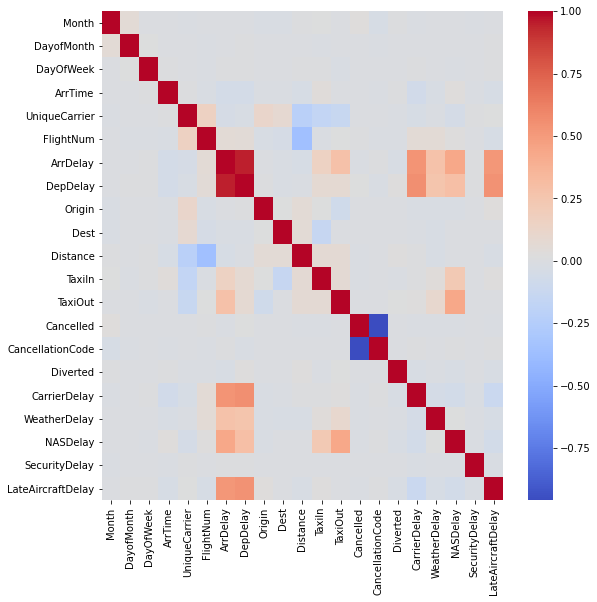

In [808]:
from seaborn import heatmap
corr = df_1.corr() # train is a pandas dataframe 

plt.figure(figsize = (9, 9))
heatmap(corr, cmap = 'coolwarm')
plt.show()

In [809]:
X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

result.summary()

0.9903437510049773 0.9903418193495307


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.127e+05
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        15:47:54   Log-Likelihood:            -3.1489e+05
No. Observations:              100000   AIC:                         6.298e+05
Df Residuals:                   99979   BIC:                         6.300e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.4021      0.018   2376.995      0.000      42.367      42.437
x1            -0.1419      0.018     -7.929      0.000      -0.177      -0.107
x2            -0.0244      0.018     -1.367      0.172      -0.059       0.011
x3            -0.0801      0.018     -4.485      0.000      -0.115      -0.045
x4             0.0285      0.018      1.586      0.113      -0.007       0.064
x5            -0.0122      0.019     -0.646      0.518      -0.049       0.025
x6            -0.0352      0.019     -1.819      0.069      -0.073       0.003
x7             4.3653      0.083     52.475      0.000       4.202       4.528
x8            -0.0232      0.018     -1.281      0.200      -0.059       0.012
x9             0.1103      0.018      6.077      0.000       0.075       0.146
x10           -1.0987      0.020    -55.679      0.000      -1.137      -1.060
x11            0.6661      0.019     34.216      0.000       0.628       0.704
x12            1.5235      0.025     60.076      0.000       1.474       1.573
x13            0.1966      0.069      2.845      0.004       0.061       0.332
x14           -0.0153      0.069     -0.221      0.825      -0.151       0.120
x15            0.7293      0.019     39.394      0.000       0.693       0.766
x16           34.7894      0.060    579.343      0.000      34.672      34.907
x17           16.5910      0.032    513.522      0.000      16.528      16.654
x18           26.5640      0.044    605.165      0.000      26.478      26.650
x19            1.4626      0.018     81.358      0.000       1.427       1.498
x20           32.9618      0.058    572.559      0.000      32.849      33.075
==============================================================================
Omnibus:                    48953.952   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           344303.162
Skew:                          -2.270   Prob(JB):                         0.00
Kurtosis:                      10.875   Cond. No.                         9.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [812]:
df_1.head(5)

,Month,DayofMonth,DayOfWeek,ArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2211.0,17,335,-14.0,8.0,135,286,810,4.0,8.0,0,3,0,2.0,0.0,2.0,0.0,8.0
1,1,3,4,1002.0,17,3231,2.0,19.0,135,286,810,5.0,10.0,0,3,0,2.0,0.0,2.0,0.0,8.0
2,1,3,4,804.0,17,448,14.0,8.0,140,48,515,3.0,17.0,0,3,0,2.0,0.0,2.0,0.0,8.0
3,1,3,4,1959.0,17,3920,34.0,34.0,140,48,515,3.0,10.0,0,3,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,2121.0,17,378,11.0,25.0,140,150,688,4.0,10.0,0,3,0,2.0,0.0,2.0,0.0,8.0


In [18]:
df_1.drop(['ActualElapsedTime','CRSElapsedTime', 'Year', 
'AirTime',
'DepTime',
'CRSArrTime',
'CRSDepTime'], axis=1, inplace=True)

In [783]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Month,4.105
1,DayofMonth,4.239
2,DayOfWeek,4.990
3,ArrTime,9.767
4,UniqueCarrier,5.075
5,FlightNum,2.655
6,ArrDelay,37.161
7,DepDelay,32.967
8,Origin,4.473
9,Dest,4.599


In [19]:
df_sample = df_1.sample(100000, random_state = 0)

In [22]:
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [23]:
print(len(X), len(y))

100000 100000


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Linear Regression:

In [25]:
clf = LinearRegression(n_jobs=-1)

In [26]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [27]:
lr_pred = clf.predict(X_test)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 3.958485184637242
Mean Squared Error: 31.405751898620593
Root Mean Squared Error: 5.604083502109921


Decision Tree:

In [34]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [35]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
rt_pred = regressor.predict(X_test)

In [37]:
# print('Absolute Error:', abs(y_test - rt_pred).sum())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 4.0327
Mean Squared Error: 66.6064
Root Mean Squared Error: 8.161274410286667


In [38]:
i_col = (df_sample.drop([forecast_col], 1))

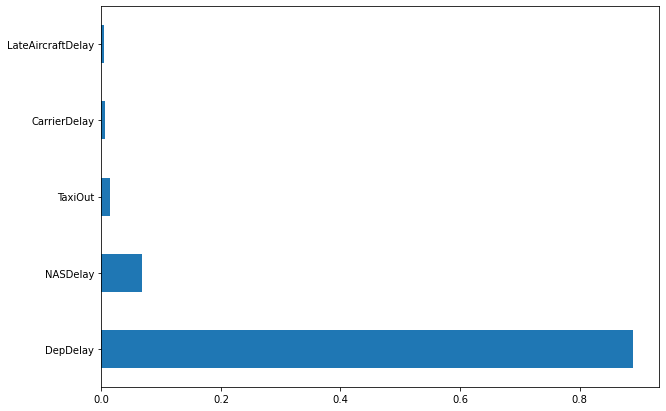

In [39]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(regressor.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');

Random Forest:

In [40]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)

In [41]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
rf_pred=rf.predict(X_test)

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 2.892229
Mean Squared Error: 33.23253879
Root Mean Squared Error: 5.764767019576767


In [44]:
i_col = (df_sample.drop([forecast_col], 1))

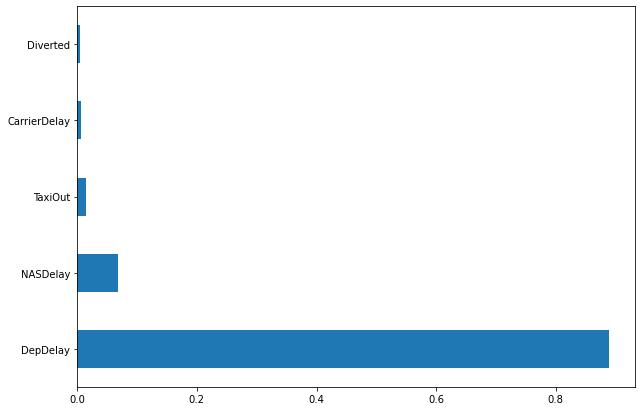

In [45]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rf.feature_importances_, index = i_col.columns)
feat_importances.nlargest(5).plot(kind='barh');

Les categòriques amb Label Encoder no afecten els resultats.

#### 1. Estandarització:

In [46]:
df_sample = df_1.sample(100000, random_state = 0)

In [47]:
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [48]:
# Només cal que escalem els features, així el resultat ens surt sense escalar, com el volem:

X = StandardScaler().fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Linear Regression:

In [52]:
clf = LinearRegression(n_jobs=-1)

In [53]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [54]:
lr_pred = clf.predict(X_test)

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 3.9584851846372753
Mean Squared Error: 31.405751898620593
Root Mean Squared Error: 5.604083502109921


Decision Tree:

In [56]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [57]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [58]:
rt_pred = regressor.predict(X_test)

In [59]:
# print('Absolute Error:', abs(y_test - rt_pred).sum())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 4.02885
Mean Squared Error: 66.60845
Root Mean Squared Error: 8.161400002450561


Random Forest:

In [60]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)

In [61]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
rf_pred=rf.predict(X_test)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 2.8876515
Mean Squared Error: 33.214806305
Root Mean Squared Error: 5.763228809009755


#### 2. Normalització

In [66]:
df_sample = df_1.sample(100000, random_state = 0)

In [67]:
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [68]:
X =preprocessing.normalize(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Linear Regression:

In [71]:
clf = LinearRegression(n_jobs=-1)

In [72]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [73]:
lr_pred = clf.predict(X_test)

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 15.643493578956257
Mean Squared Error: 793.1742813300218
Root Mean Squared Error: 28.163349966401757


Decision Tree:

In [75]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [76]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [77]:
rt_pred = regressor.predict(X_test)

In [78]:
# print('Absolute Error:', abs(y_test - rt_pred).sum())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 6.72125
Mean Squared Error: 166.01815
Root Mean Squared Error: 12.884803064075134


Random Forest:

In [79]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)

In [80]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [81]:
rf_pred=rf.predict(X_test)

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 4.4103065
Mean Squared Error: 71.005414765
Root Mean Squared Error: 8.426471074239798


#### 3. Transformació logarítmica dels features

In [83]:
df_sample = df_1.sample(100000, random_state = 0)

In [84]:
X = df_sample.drop([forecast_col], 1)

In [85]:
# Transformació dels features a log.

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import QuantileTransformer, quantile_transform

X = quantile_transform(X, n_quantiles=900, output_distribution='normal', copy=True, random_state = 0).squeeze()

In [86]:
y = np.array(df_sample[forecast_col])

In [87]:
y

array([ 9., -3., 13., ..., 95., 16., 52.])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Linear Regression:

In [89]:
clf = LinearRegression(n_jobs=-1)

In [90]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [91]:
score_test

0.408772418242455

In [92]:
lr_pred = clf.predict(X_test)

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 27.759804401290463
Mean Squared Error: 1938.4429367113798
Root Mean Squared Error: 44.027751892543634


Decision Tree:

In [94]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [95]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [96]:
rt_pred = regressor.predict(X_test)

In [97]:
# print('Absolute Error:', abs(y_test - rt_pred).sum())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 3.7626966646585287
Mean Squared Error: 53.8160645215871
Root Mean Squared Error: 7.335943328678807


Random Forest:

In [98]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)

In [99]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=30, random_state=42)

In [100]:
rf_pred=rf.predict(X_test)

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 2.9411339378720625
Mean Squared Error: 34.40527587223388
Root Mean Squared Error: 5.865601066577396


#### 4. PCA

In [190]:
df_sample = df_1.sample(100000, random_state = 0)

In [191]:
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [192]:
# Abans d'aplicar el PCA hem d'estanderitzar les dades:
X = StandardScaler().fit_transform(X)

In [193]:
# Principal Component Analysys

pca = PCA(n_components=0.9)
X = pca.fit_transform(X)

print('La variància de cada un dels components seleccionats és:',pca.explained_variance_ratio_) # Treiem els variance ratio del número de components seleccionats
print('La suma de la variància de tots els components seleccionats:',pca.explained_variance_ratio_.sum()) # Sumem el variance ratio per veure quanta informació treiem amb el número de PCA

La variància de cada un dels components seleccionats és: [0.09845386 0.09573953 0.08012756 0.071265   0.0576329  0.05655087
 0.05324176 0.05185365 0.05060221 0.05045166 0.05006106 0.04964841
 0.04786388 0.04660117 0.04144994]
La suma de la variància de tots els components seleccionats: 0.9015434512638231


Per retenir un 90% de la informació total fent servir PCA, ens hem de quedar amb 15 dels 20 atributs totals. No és un PCA molt eficaç.

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Linear Regression:

In [195]:
clf = LinearRegression(n_jobs=-1)

In [196]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [197]:
score_test

0.9765922626727173

In [198]:
lr_pred = clf.predict(X_test)

In [199]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 6.3837925409281056
Mean Squared Error: 76.74635704846743
Root Mean Squared Error: 8.76049981727455


Decision Tree:

In [200]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [201]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [172]:
rt_pred = regressor.predict(X_test)

In [173]:
# print('Absolute Error:', abs(y_test - rt_pred).sum())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 8.124301490309223
Mean Squared Error: 124.66993324742916
Root Mean Squared Error: 11.165569096442383


Random Forest:

In [174]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)

In [175]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=30, random_state=42)

In [176]:
rf_pred=rf.predict(X_test)

In [177]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 6.090935968003699
Mean Squared Error: 70.88887059826081
Root Mean Squared Error: 8.41955287401064


#### 5. Feature selection amb f_regression

In [120]:
df_sample = df_1.sample(100000, random_state = 0)

In [121]:
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [123]:
# Passem la funció de top features amb f_regression. N'agafem els 10 més importants:

from sklearn.feature_selection import f_regression
import operator

def getTopFeatures(train_x, train_y, n_features=10):
    f_val, p_val = f_regression(train_x,train_y)
    f_val_dict = {}
    p_val_dict = {}
    for i in range(len(f_val)):
        if math.isnan(f_val[i]):
            f_val[i] = 0.0
        f_val_dict[i] = f_val[i]
        if math.isnan(p_val[i]):
            p_val[i] = 0.0
        p_val_dict[i] = p_val[i]
    
    sorted_f = sorted(f_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_p = sorted(p_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    
    feature_indexs = []
    for i in range(0,n_features):
        feature_indexs.append(sorted_f[i][0])
    
    return feature_indexs

In [124]:
features = getTopFeatures(X,y) 

In [125]:
features

[6, 15, 19, 17, 11, 16, 10, 5, 3, 4]

In [126]:
columns = []
for i in features:
    x = df.columns[i]
    columns.append(x)
    
columns

['ArrDelay',
 'Diverted',
 'SecurityDelay',
 'WeatherDelay',
 'TaxiIn',
 'CarrierDelay',
 'Distance',
 'FlightNum',
 'ArrTime',
 'UniqueCarrier']

In [127]:
df_top_features = df[columns]

In [128]:
# Afegim el target al nou df:

df_top_features['ArrDelay'] = df['ArrDelay']

<ipython-input-128-ec17a4266093>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_features['ArrDelay'] = df['ArrDelay']


In [129]:
#Agafem la mostra del nou df amb els 'top features' seleccionats:
df_sample = df_top_features.sample(100000, random_state = 0)

In [130]:
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Linear Regression:

In [132]:
clf = LinearRegression(n_jobs=-1)

In [133]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [134]:
score_test

0.37878498004805417

In [135]:
lr_pred = clf.predict(X_test)

In [136]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 29.210035574351284
Mean Squared Error: 2036.7619927763983
Root Mean Squared Error: 45.13049958483064


Decision Tree:

In [137]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [138]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [139]:
rt_pred = regressor.predict(X_test)

In [140]:
# print('Absolute Error:', abs(y_test - rt_pred).sum())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 20.89043208376734
Mean Squared Error: 1511.8743268307223
Root Mean Squared Error: 38.8828281742818


Random Forest:

In [141]:
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)

In [142]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=30, random_state=42)

In [143]:
rf_pred=rf.predict(X_test)

In [144]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 20.12596931546881
Mean Squared Error: 1258.2192138110856
Root Mean Squared Error: 35.471385845651504


Conclusió: observem que en el cas de voler predir l'enderreriment dels vols, la selecció d'atributs no és una bona estratègia. Com més atributs treiem, més incrementen el MAE, MSE i l'RMSE. Per altra banda el fet d'afegir les variables categòriques (que inicialment haviem descartat) mitjançant un Label Encoder, tampoc ajuda a millorar les mètriques. En canvi, el procés d'estanderització sí que ha fet augmentar la precisió de les prediccions.

## Nivell 3

### Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [203]:
df = pd.read_csv('DelayedFlights.csv')

In [1020]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [1022]:
df.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,4,5
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003.0,754.0,628.0,1829.0,1940.0
CRSDepTime,1955,735,620,1755,1915
ArrTime,2211.0,1002.0,804.0,1959.0,2121.0
CRSArrTime,2225,1000,750,1925,2110
UniqueCarrier,WN,WN,WN,WN,WN


Hem comprovat que el label encoder de les variables categòriques Unique Carrier, Origin, Dest i Cancellation Code (mitjançant Label Encoder) no fan millorar les nostres prediccions

In [204]:
df_1 = df
df_1.drop(['Unnamed: 0','UniqueCarrier',
         'CancellationCode', 'Origin', 'Dest' ], axis=1, inplace=True)

A banda de DepDelay, eliminem les variables que haviem eliminat anteriorment per reduir la colinealitat.  

MOLT IMPORTANT !!   

Tambe eliminem aquelles variables que sumades donen els valors d'Arrival Delay ('CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'). Si no eliminem aquestes variables, la diferència entre eliminar o no la variable 'DepDelay' no es fa palesa, seguim tenim unes prediccions molt encertades.  
L'única diferència entre Arrival Delay i la suma d'aquestes variables és que les 4 anteriors no reben registres si l'enderreriment del vol no és superior als 15 minuts.

In [205]:
df_1.drop(['DepDelay','ActualElapsedTime','CRSElapsedTime', 'Year', 
'AirTime',
'DepTime',
'CRSArrTime',
'CRSDepTime','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

Si no les eliminem les prediccions són massa bones perquè les variables independents contenen els resultats que busquem

In [1025]:
df_1['TailNum'].value_counts()

N325SW    965
N676SW    951
N658SW    945
N313SW    937
N308SA    936
         ... 
9149E       1
N856NW      1
N104UA      1
9189E       1
N859NW      1
Name: TailNum, Length: 5366, dtype: int64

Podria fer webscrapping de la web https://www.planespotters.net/search?q=N325SW+ per extreure l'any de cada avió tenint en compte el seu número de cua, agrupar els avions per edats i comprovar si l'edat de l'avió té una influència directe en els retards dels vols. Això de moment ho deixem per una tasca posterior.

In [206]:
df_1.drop('TailNum', axis=1, inplace = True)

In [207]:
for i in df_1.columns:
    df_1[i].fillna(df_1[i].median(), inplace = True)

In [1001]:
X = df_1.iloc[:,:-1]
round(calc_vif(X),3)

,variables,VIF
0,Month,3.762
1,DayofMonth,3.875
2,DayOfWeek,4.455
3,CRSDepTime,24.366
4,CRSArrTime,25.734
5,FlightNum,2.321
6,ArrDelay,1.739
7,Distance,2.928
8,TaxiIn,2.670
9,TaxiOut,2.804


Ara tenim un VIF adequat per a la variable target, Arrival Delay < 5 (menys 5 indica una multicolinealitat acceptable).

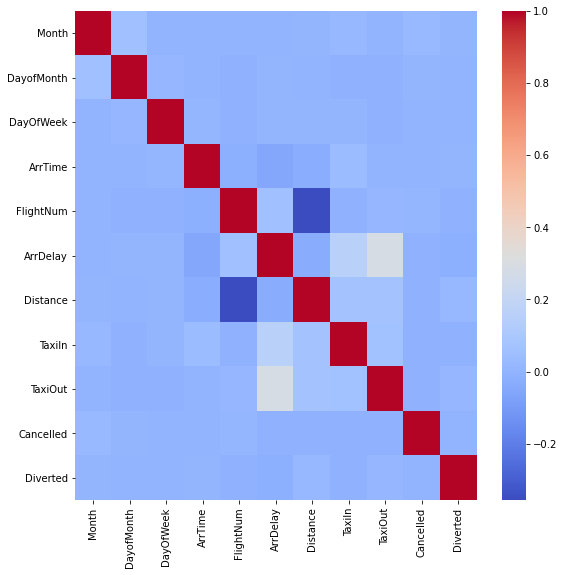

In [208]:
from seaborn import heatmap
corr = df_1.corr() # train is a pandas dataframe 

plt.figure(figsize = (9, 9))
heatmap(corr, cmap = 'coolwarm')
plt.show()

In [209]:
df_sample = df_1.sample(100000, random_state = 0)

In [210]:
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])

In [211]:
X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

result.summary()

0.10751392756494871 0.1074246691392784


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1205.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        17:56:24   Log-Likelihood:            -5.4121e+05
No. Observations:              100000   AIC:                         1.082e+06
Df Residuals:                   99989   BIC:                         1.083e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1954      0.884     23.981      0.000      19.463      22.928
x1            -0.0403      0.049     -0.815      0.415      -0.137       0.057
x2             0.0320      0.020      1.634      0.102      -0.006       0.070
x3             0.5105      0.086      5.942      0.000       0.342       0.679
x4            -0.0065      0.000    -20.604      0.000      -0.007      -0.006
x5             0.0012   9.47e-05     12.283      0.000       0.001       0.001
x6            -0.0049      0.000    -15.196      0.000      -0.006      -0.004
x7             1.5298      0.033     46.517      0.000       1.465       1.594
x8             1.1053      0.012     92.316      0.000       1.082       1.129
x9           -16.9896      9.045     -1.878      0.060     -34.718       0.738
x10          -19.5947      2.795     -7.010      0.000     -25.074     -14.116
==============================================================================
Omnibus:                    94244.979   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8262464.773
Skew:                           4.329   Prob(JB):                         0.00
Kurtosis:                      46.681   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
X = StandardScaler().fit_transform(X)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### LinearRegression sense DepDelay:

In [214]:
clf = LinearRegression(n_jobs=-1)

In [215]:
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [216]:
score_test

0.10034646325783114

In [217]:
clf.coef_

array([-0.24078918,  0.15019319,  1.01764124, -3.59581886,  2.27645097,
       -2.9575977 ,  7.89760714, 15.87781478, -0.32565205, -1.19343688])

In [218]:
clf.intercept_

42.25370619297639

In [219]:
lr_pred = clf.predict(X_test)

In [220]:
df_lr=pd.DataFrame({'Actual':y_test, 'Predicted':lr_pred})
df_lr

,Actual,Predicted
0,14.0,54.099342
1,10.0,32.200326
2,82.0,41.913151
3,63.0,35.750098
4,23.0,45.670323
...,...,...
19995,13.0,52.137552
19996,-11.0,30.924961
19997,12.0,43.677393
19998,27.0,41.082975


In [221]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 34.961815410345864
Mean Squared Error: 3145.272325341703
Root Mean Squared Error: 56.082727513394914


#### DecisionTreeRegressor sense DepDelay:

In [223]:
regressor = DecisionTreeRegressor(max_depth = 15, random_state=0)

In [224]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [225]:
np.round(regressor.feature_importances_, 3)

array([0.047, 0.069, 0.028, 0.306, 0.134, 0.131, 0.086, 0.199, 0.   ,
       0.001])

In [226]:
rt_pred = regressor.predict(X_test)

In [228]:
df_rt=pd.DataFrame({'Actual':y_test, 'Predicted':rt_pred})
df_rt

,Actual,Predicted
0,14.0,33.563830
1,10.0,34.369565
2,82.0,36.315476
3,63.0,36.778032
4,23.0,20.721362
...,...,...
19995,13.0,40.978512
19996,-11.0,16.867715
19997,12.0,23.956522
19998,27.0,27.962963


In [229]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rt_pred)))

Mean Absolute Error: 36.20794339230919
Mean Squared Error: 4136.849394999465
Root Mean Squared Error: 64.3183441562317


In [230]:
i_col = (df_sample.drop([forecast_col], 1))

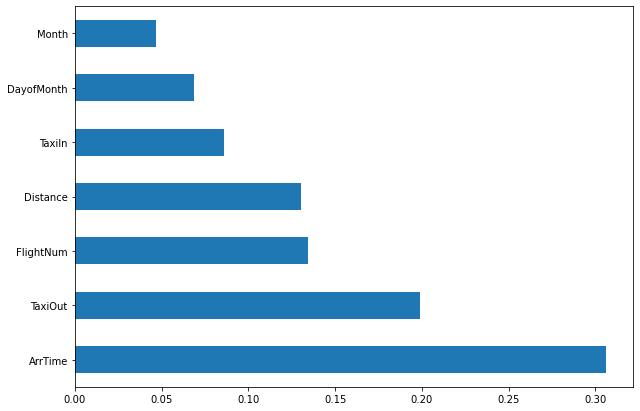

In [236]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(regressor.feature_importances_, index = i_col.columns)
feat_importances.nlargest(7).plot(kind='barh');

#### RandomForestRegressor sense DepDelay:

In [239]:
rf = RandomForestRegressor(random_state = 42)

In [240]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [241]:
rf_pred=rf.predict(X_test)

In [242]:
df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':rt_pred})
df_rf

,Actual,Predicted
0,14.0,33.563830
1,10.0,34.369565
2,82.0,36.315476
3,63.0,36.778032
4,23.0,20.721362
...,...,...
19995,13.0,40.978512
19996,-11.0,16.867715
19997,12.0,23.956522
19998,27.0,27.962963


In [243]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 33.470971999999996
Mean Squared Error: 2865.77492656
Root Mean Squared Error: 53.53293310253045


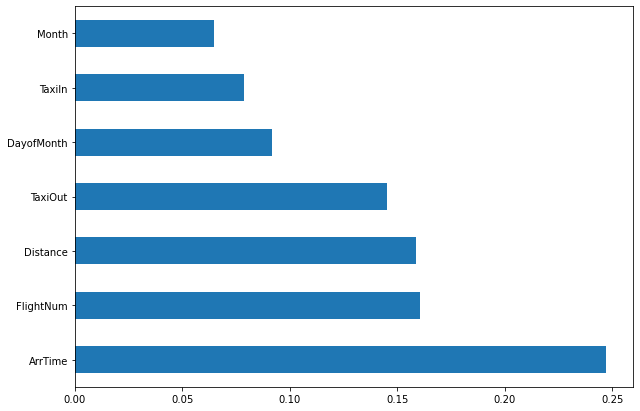

In [244]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rf.feature_importances_, index = i_col.columns)
feat_importances.nlargest(7).plot(kind='barh');

### Conclusions: 
- Hem aconseguit un MAE = 2.68 i un RMSE = 8.13 en el test set, per les nostres predicciones fent servir l'algoritme Random Forest Regressor i eliminant la variable DepDelay. Les variables independents més importants per a la predicció d'aquest model són (en el mateix ordre): Late Aircraft Delay, Carrier Delay, NASDelay i WeatherDelay. Ara bé, quan hem eliminat aquestes variables les mètriques han augmentat dramàticament i el millor que hem aconseguit ha estat un MAE = 33.47 i un RMSE = 53.53 fent servir Random Forest.


- Les variables que han aconseguit una predicció tan bona están directament relacionades amb la variable Arrival Delay ja que si sumes els valors de les quatre obtens els valors d'Arrival Delay (són els seus components). Si les eliminem ens trobem amb un problema de predicció que emularia millor una situació real.  


- Creiem que el plantejament del problema no és l'adequat pel dataset. Altres treballs al voltant d'aquest dataset s'han preguntat quin efecte tenen les dates i horaris dels vols en el seu retard o si l'edat de l'avió hi té algun paper.  


- Tot i així hem treballat a la primera part com ho indicaven els anunciats i al final hem intentat recrear una situació més realista eliminant les variables que ja ens aportaven la solució del problema i hem arribat a una predicció del.. fent servir ...



In [182]:
# Posar tot el tema de VIF junt, eliminar totes les variables alhora i no en 10 pasos.

In [ ]:
# REPASSAR, per millorar:
# Mirar els reptes del dataset. Es poden identificar quant vells són els avions pel tailnum i si té algo a veure amb el retard?
# Treballar amb les dates
# Afegir Lasso, Ridge i Xarxes neuronals